In [73]:
#Pre & Post Pruning

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [75]:
dataset = pd.read_csv(r"D:\\DataScience\\seaborn-data-master\\bank_data.csv")

dataset.head(3)

,installment,int.rate,delinq.2yrs
0,829.10,0.1189,1
1,228.22,0.1071,0
2,366.86,0.1357,1


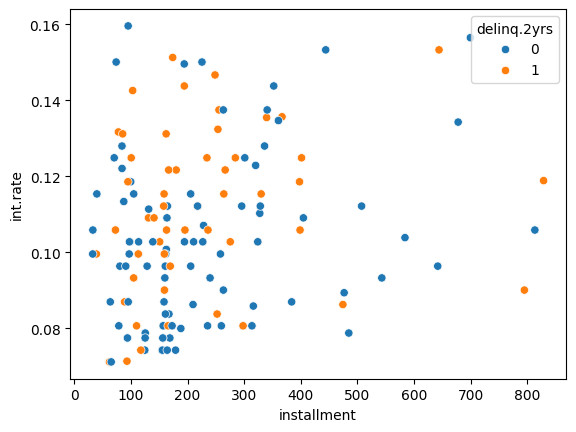

In [76]:
sns.scatterplot(x="installment",y="int.rate",data=dataset,hue="delinq.2yrs")
plt.show()

In [77]:
x=dataset.iloc[:,:-1]
y=dataset["delinq.2yrs"]

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc= StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
#pre pruning

In [84]:
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [85]:
dt.score(x_train,y_train)*100

70.07874015748031

In [86]:
dt.score(x_test,y_test)*100

56.25

In [87]:
dt.predict([[829.10	, 0.1189]])

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [88]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


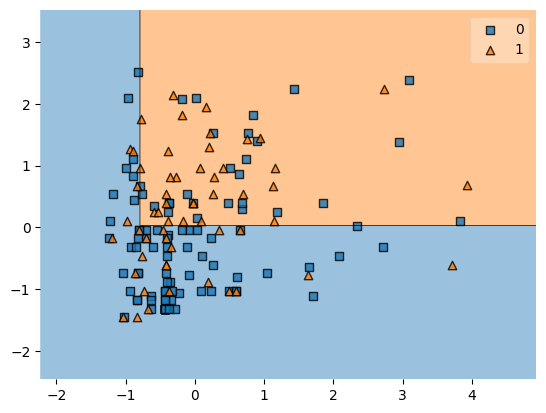

In [89]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [90]:
from sklearn.tree import plot_tree

In [91]:
plt.figure(figsize=(100,100))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()

In [ ]:
#post pruning

In [92]:
for i in range(1,20):
    dt2= DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

0.6692913385826772 0.53125 1
0.7007874015748031 0.5625 2
0.7637795275590551 0.625 3
0.7952755905511811 0.59375 4
0.8110236220472441 0.53125 5
0.8503937007874016 0.5625 6
0.889763779527559 0.65625 7
0.937007874015748 0.6875 8
0.952755905511811 0.59375 9
0.968503937007874 0.625 10
0.968503937007874 0.625 11
0.968503937007874 0.6875 12
0.968503937007874 0.6875 13
0.968503937007874 0.6875 14
0.968503937007874 0.65625 15
0.968503937007874 0.625 16
0.968503937007874 0.625 17
0.968503937007874 0.625 18
0.968503937007874 0.6875 19
